# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import set_config
set_config("figure")
from warnings import filterwarnings 
filterwarnings('ignore')

In [6]:
X, y  = df[['age','job', 'marital','education', 'default', 'housing', 'loan', 'campaign']] , df['y']

In [7]:
y  = y.map({'no': 0, 'yes': 1})

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### The target is an imbalanced class. So using the stratify method to split train and test with equal proportion of the target

In [8]:
y.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3, stratify = y )

In [10]:
y_train.value_counts(normalize=True)

0    0.887343
1    0.112657
Name: y, dtype: float64

In [11]:
y_test.value_counts(normalize=True)

0    0.887351
1    0.112649
Name: y, dtype: float64

### It is advised to split the data before encoding to avoid data leakage

#### https://towardsdatascience.com/avoid-data-leakage-split-your-data-before-processing-a7f172632b00
#### https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [12]:
import category_encoders as ce
target_encoder = ce.TargetEncoder()

In [13]:
X_train = target_encoder.fit_transform(X_train, y_train)
X_test = target_encoder.fit_transform(X_test, y_test)

In [14]:
X_train['age'] = (X_train['age'] - X_train['age'].mean())/X_train['age'].std()
X_train['campaign'] = (X_train['campaign'] - X_train['campaign'].mean())/X_train['campaign'].std()

In [15]:
X_test['age'] = (X_test['age'] - X_train['age'].mean())/X_train['age'].std()
X_test['campaign'] = (X_test['campaign'] - X_train['campaign'].mean())/X_train['campaign'].std()

In [16]:
pd.concat([X_train, y_train], axis = 1)

,age,job,marital,education,default,housing,loan,campaign,y
7309,0.960999,0.070521,0.140874,0.105759,0.128595,0.109967,0.112400,-0.202496,0
4169,1.057210,0.080443,0.101107,0.111443,0.052719,0.109967,0.112400,0.887186,0
35810,0.576155,0.107699,0.102379,0.111443,0.128595,0.114817,0.112400,-0.202496,0
9668,0.576155,0.128873,0.140874,0.137708,0.128595,0.114817,0.112400,-0.565723,0
34389,-1.444277,0.080443,0.140874,0.108371,0.128595,0.109967,0.112400,0.887186,1
...,...,...,...,...,...,...,...,...,...
27855,-1.059433,0.107699,0.140874,0.111443,0.128595,0.109967,0.112400,-0.202496,1
7494,-1.059433,0.128873,0.101107,0.137708,0.128595,0.109967,0.112400,-0.565723,0
10747,-0.482167,0.128873,0.101107,0.137708,0.128595,0.109967,0.113498,0.160732,0
34138,-0.770800,0.070521,0.140874,0.105759,0.128595,0.114817,0.113498,0.523959,0


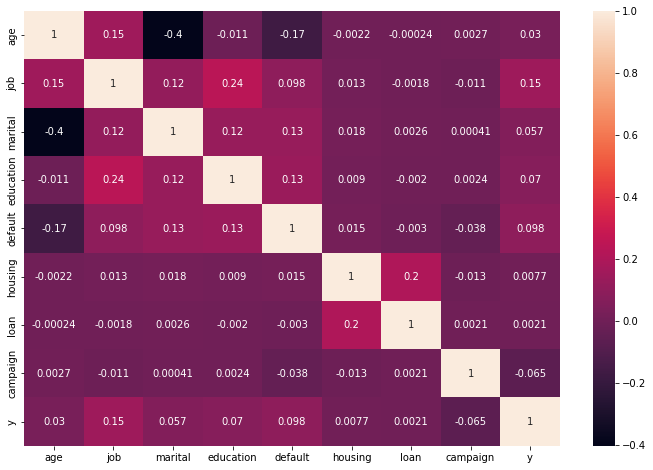

In [17]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(pd.concat([X_train, y_train], axis = 1).corr(), annot=True)
fig.savefig('heatmap.png')
plt.show()

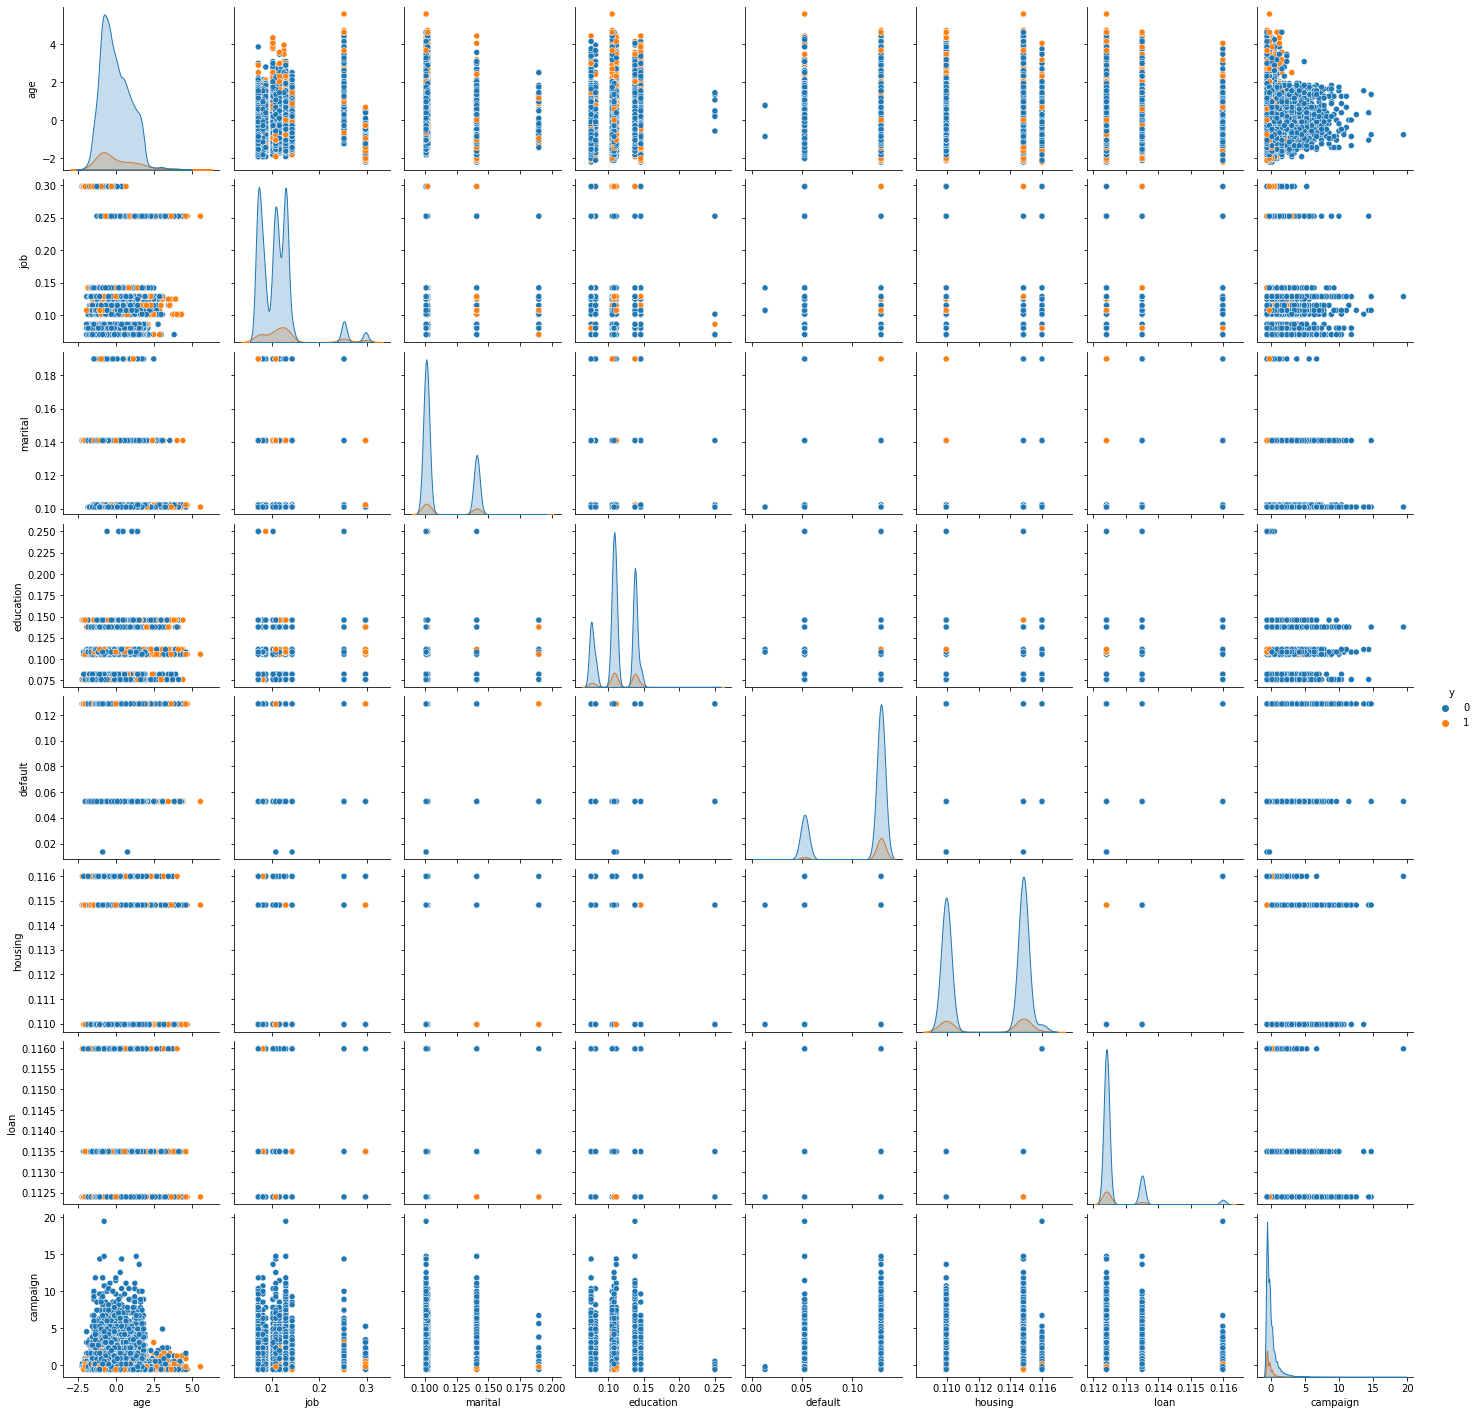

In [18]:
pairplot = sns.pairplot(pd.concat([X_train, y_train], axis = 1), hue = 'y' )
pairplot.savefig('images/pairplot.png')

In [19]:
pd.crosstab(index = df['y'], columns = df['housing'], normalize=True)*100

housing,no,unknown,yes
y,,,
no,40.293289,2.143828,46.297465
yes,4.918908,0.259784,6.086724


In [20]:
pd.crosstab(index = df['y'], columns = df['loan'], normalize=True)*100

loan,no,unknown,yes
y,,,
no,73.079538,2.143828,13.511217
yes,9.347383,0.259784,1.658250


In [21]:
pd.crosstab(index = df['y'], columns = df['education'], normalize=True)*100

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,9.099738,5.108284,13.528212,20.598232,0.033990,11.284840,25.488006,3.593280
yes,1.039138,0.456444,1.148393,2.503156,0.009712,1.444596,4.054579,0.609401


#### As can be see from above some basic inferences can be made such as 
1. Younger people subscribed to the deposits more than the older people
2. People who had more years of education like a university degree were more likely to subscribe to the deposit.
3. People who own housing are more likely to subscribe to deposit than who don't
4. People with no loans are more likely to subscribe to a deposit
5. Older people were called up more times than younger clients
6. Some people were contacted more than 50 times
7. The number of times a campaign was conducted had a negative impact on the subcribing to a deposit

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [22]:
y_train.value_counts(normalize=True)

0    0.887343
1    0.112657
Name: y, dtype: float64

In [23]:
from sklearn.dummy import DummyClassifier

In [24]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
print(f'Baseline Training Score: {dummy_clf.score(X_train, y_train)}')
print(f'Baseline Test Score: {dummy_clf.score(X_test, y_test)}')

Baseline Training Score: 0.8873434844438278
Baseline Test Score: 0.8873512988589464


### The baseline accuracy of the model is 88.7% for the majority group

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Using LogisticRegression model to classify customers likely to make a deposit

In [25]:
lgr_pipe = Pipeline([
    ('lgr', LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state=42, max_iter=1000))
])
lgr_pipe.get_params()

{'memory': None,
 'steps': [('lgr',
   LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                      solver='liblinear'))],
 'verbose': False,
 'lgr': LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                    solver='liblinear'),
 'lgr__C': 1.0,
 'lgr__class_weight': None,
 'lgr__dual': False,
 'lgr__fit_intercept': True,
 'lgr__intercept_scaling': 1,
 'lgr__l1_ratio': None,
 'lgr__max_iter': 1000,
 'lgr__multi_class': 'auto',
 'lgr__n_jobs': None,
 'lgr__penalty': 'l1',
 'lgr__random_state': 42,
 'lgr__solver': 'liblinear',
 'lgr__tol': 0.0001,
 'lgr__verbose': 0,
 'lgr__warm_start': False}

In [26]:
lgr_params = {'lgr__C': np.logspace(-5, .5)}

In [27]:
lgr_grid = GridSearchCV(lgr_pipe, param_grid = lgr_params, scoring = 'roc_auc')
lgr_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('lgr',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='l1',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'lgr__C': array([1.00000000e-05, 1.29492584e-05, 1.67683294e-05, 2.17137430e-05,
       2.81176870e-05, 3.64103195e-05, 4.71486636e-05, 6.10540230e-05,
       7.90604321e-05, 1.02377397e-04, 1.32571137e-04, 1.71669791e-04,
       2.22299648e...
       1.38949549e-02, 1.79929362e-02, 2.32995181e-02, 3.01711481e-02,
       3.90693994e-02, 5.05919749e-02, 6.55128557e-02, 8.48342898e-02,
       1.09854114e-01, 1.42252931e-01, 1.84206997e-01, 2.38534401e-01,
       3.08884360e-01, 3.99982340e-01, 5.17947468e-01, 6.70703561e-01,
       8.68511374e-01, 1.12465782e+00, 1.45634848e+00, 1.88586328e+00,
       2.44205309e+00,

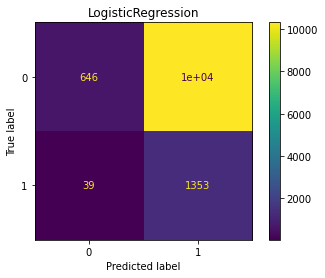

In [30]:
ConfusionMatrixDisplay.from_estimator(lgr_grid, X_test, y_test)
plt.title('LogisticRegression')
plt.savefig('images/cm_lgr.png')

In [54]:
dfResults = pd.DataFrame(columns = ['Model', 'Train Time', 'Train Accuracy',\
                                    'Test Accuracy', 'Precision Score', 'Recall Score', 'Best Params'])

In [55]:
dfResults.loc[len(dfResults)] = {
    'Model' : 'LinearRegression',
    'Train Time' : lgr_grid.cv_results_['mean_fit_time'].mean(),
    'Train Accuracy': lgr_grid.score(X_train, y_train),
    'Test Accuracy' : lgr_grid.score(X_test, y_test),
    'Precision Score': precision_score(y_test, lgr_grid.predict(X_test), pos_label = 1),
    'Recall Score' : recall_score(y_test, lgr_grid.predict(X_test), pos_label = 1),
    'Best Params' : lgr_grid.best_params_
}
dfResults

,Model,Train Time,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Best Params
0,LinearRegression,0.30528,0.662931,0.580575,0.115918,0.971983,{'lgr__C': 3.1622776601683795}


#### Using scoring = 'roc_auc' gives better recall score but lower precision score compared to rest of the scoring methods for LinearRegression classifier. The other scoring methods are even worse, showing zero F1 score and recall scores

### Using KNN classifier to classify customers likely to subscribe to deposits

In [33]:
knn_pipe = Pipeline([
   ('knn', KNeighborsClassifier())
])
knn_pipe.get_params()

{'memory': None,
 'steps': [('knn', KNeighborsClassifier())],
 'verbose': False,
 'knn': KNeighborsClassifier(),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [48]:
knn_params = {'knn__n_neighbors' : list(range(3,50,2))}
knn_grid = GridSearchCV(knn_pipe, param_grid = knn_params).fit(X_train, y_train)

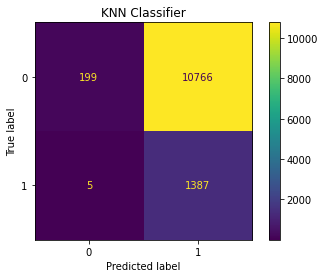

In [49]:
ConfusionMatrixDisplay.from_estimator(knn_grid, X_test, y_test)
plt.title('KNN Classifier')
plt.savefig('images/cm_knn.png')

In [56]:
dfResults.loc[len(dfResults)] = {
    'Model' : 'KNN',
    'Train Time' : knn_grid.cv_results_['mean_fit_time'].mean(),
    'Train Accuracy': knn_grid.score(X_train, y_train),
    'Test Accuracy' : knn_grid.score(X_test, y_test),
    'Precision Score': precision_score(y_test, knn_grid.predict(X_test), pos_label = 1),
    'Recall Score' : recall_score(y_test, knn_grid.predict(X_test), pos_label = 1),
    'Best Params' : knn_grid.best_params_
}
dfResults

,Model,Train Time,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Best Params
0,LinearRegression,0.305280,0.662931,0.580575,0.115918,0.971983,{'lgr__C': 3.1622776601683795}
1,KNN,0.118708,0.887968,0.128348,0.114128,0.996408,{'knn__n_neighbors': 43}


### Using Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [58]:
dtree_pipe = Pipeline([
    ('dtree', DecisionTreeClassifier())
])
dtree_pipe.get_params()

{'memory': None,
 'steps': [('dtree', DecisionTreeClassifier())],
 'verbose': False,
 'dtree': DecisionTreeClassifier(),
 'dtree__ccp_alpha': 0.0,
 'dtree__class_weight': None,
 'dtree__criterion': 'gini',
 'dtree__max_depth': None,
 'dtree__max_features': None,
 'dtree__max_leaf_nodes': None,
 'dtree__min_impurity_decrease': 0.0,
 'dtree__min_samples_leaf': 1,
 'dtree__min_samples_split': 2,
 'dtree__min_weight_fraction_leaf': 0.0,
 'dtree__random_state': None,
 'dtree__splitter': 'best'}

In [59]:
dtree_params = {'dtree__max_depth' : list(range(1,11)), 'dtree__criterion': ['gini', 'entropy'],
                'dtree__min_impurity_decrease': [0.01, 0.02, 0.03, 0.04, 0.05]}

In [65]:
drtee_grid = GridSearchCV(dtree_pipe, param_grid = dtree_params).fit(X_train, y_train)

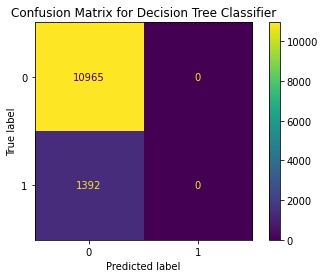

In [82]:
ConfusionMatrixDisplay.from_estimator(drtee_grid, X_test, y_test)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.savefig('images/cm_DecisionTree.png')

In [67]:
dfResults.loc[len(dfResults)] = {
    'Model' : 'Decision Tree',
    'Train Time' : drtee_grid.cv_results_['mean_fit_time'].mean(),
    'Train Accuracy': drtee_grid.score(X_train, y_train),
    'Test Accuracy' : drtee_grid.score(X_test, y_test),
    'Precision Score': precision_score(y_test, drtee_grid.predict(X_test), pos_label = 1),
    'Recall Score' : recall_score(y_test, drtee_grid.predict(X_test), pos_label = 1),
    'Best Params' : drtee_grid.best_params_
}
dfResults

,Model,Train Time,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Best Params
0,LinearRegression,0.305280,0.662931,0.580575,0.115918,0.971983,{'lgr__C': 3.1622776601683795}
1,KNN,0.118708,0.887968,0.128348,0.114128,0.996408,{'knn__n_neighbors': 43}
2,Decision Tree,0.009162,0.887343,0.887351,0.000000,0.000000,"{'dtree__criterion': 'gini', 'dtree__max_depth..."


### Using the SVM classifier

#### Using a smaller dataset for Support Vector Classifier as its taking longer than normal to learn.

In [68]:
df2 = pd.read_csv('data/bank-additional.csv', sep = ';')

In [69]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [71]:
X_trimmed, y_trimmed  = df2[['age','job', 'marital','education', 'default', 'housing', 'loan', 'campaign']] , df2['y']

In [72]:
y_trimmed = y_trimmed.map({'no':0, 'yes':1})

In [73]:
X_train_trimmed, X_test_trimmed, y_train_trimmed, y_test_trimmed =\
            train_test_split(X_trimmed, y_trimmed, random_state = 42, test_size = 0.3, stratify = y_trimmed )

In [74]:
X_train_trimmed = target_encoder.fit_transform(X_train_trimmed, y_train_trimmed)
X_test_trimmed = target_encoder.fit_transform(X_test_trimmed, y_test_trimmed)

In [75]:
X_train_trimmed['age'] = (X_train_trimmed['age'] - X_train_trimmed['age'].mean())/X_train_trimmed['age'].std()
X_train_trimmed['campaign'] = (X_train_trimmed['campaign'] - X_train_trimmed['campaign'].mean())/X_train_trimmed['campaign'].std()

In [76]:
X_test_trimmed['age'] = (X_test_trimmed['age'] - X_train_trimmed['age'].mean())/X_train_trimmed['age'].std()
X_test_trimmed['campaign'] = (X_test_trimmed['campaign'] - X_train_trimmed['campaign'].mean())/X_train_trimmed['campaign'].std()

In [77]:
svm_pipe = Pipeline([
    ('svm', SVC())
])
svm_pipe.get_params()

{'memory': None,
 'steps': [('svm', SVC())],
 'verbose': False,
 'svm': SVC(),
 'svm__C': 1.0,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

In [ ]:
{'svm__gamma': [0.1, 0.01, 10.0, 100.0], 'svm__kernel' : ['linear', 'rbf', 'poly', 'sigmoid']}

svm_params = {'svm__kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
             'svm__degree' : list(range(1,6))}

In [ ]:
svm_grid = GridSearchCV(svm_pipe, param_grid = svm_params)\
                .fit(X_train_trimmed, y_train_trimmed)

In [84]:
#len(dfResults)
dfResults.loc[3] = {
    'Model' : 'SVM',
    'Train Time' : svm_grid.cv_results_['mean_fit_time'].mean(),
    'Train Accuracy': svm_grid.score(X_train_trimmed, y_train_trimmed),
    'Test Accuracy' : svm_grid.score(X_test_trimmed, y_test_trimmed),
    'Precision Score': precision_score(y_test_trimmed, svm_grid.predict(X_test_trimmed), pos_label = 1),
    'Recall Score' : recall_score(y_test_trimmed, svm_grid.predict(X_test_trimmed), pos_label = 1),
    'Best Params' : svm_grid.best_params_
}
dfResults

,Model,Train Time,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Best Params
0,LinearRegression,0.305280,0.662931,0.580575,0.115918,0.971983,{'lgr__C': 3.1622776601683795}
1,KNN,0.118708,0.887968,0.128348,0.114128,0.996408,{'knn__n_neighbors': 43}
2,Decision Tree,0.009162,0.887343,0.887351,0.000000,0.000000,"{'dtree__criterion': 'gini', 'dtree__max_depth..."
3,SVM,1.082576,0.611910,0.561570,0.545455,0.044444,"{'svm__degree': 2, 'svm__kernel': 'poly'}"


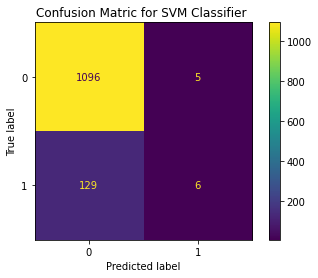

In [85]:
ConfusionMatrixDisplay.from_estimator(svm_grid, X_test_trimmed, y_test_trimmed)
plt.title('Confusion Matric for SVM Classifier ')
plt.savefig('images/cm_SVM.png')

### Analysis and Conclusions

1. SVM Classifier took the longest to train even on a reduced dataset. The best params for the Support Vector classifier is the polynomial kernel with degree 2.
2. The Logistic Regression and Decision Tree classifiers have better train accuracy but the test accuracy was poor for the KNN classifier. The best number of neighbors for the KNN is 43. 
3. Picking and using the right classifier for different tasks is more of an art than actual science but different tools such as as GridSearchCV help simplify the process

##### Questions